In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import io
import requests


import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
#import all the necessary liabriries requried if needed with insert more

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.shape
#32560 rows and 15 olumns

(32560, 15)

In [4]:
df.info()
#dataset has mix of data types.
#Age,Fnlwgt, education_num, capital gain, capital loss, hours per week are Numerical variable and having int64 datatypes.
#Work class, Education,Marital status, occupation, relationship, race,sex,native country are categorical feature with object datatypes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.isnull().sum()
#no null value in data det

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [6]:
df.duplicated().sum()
#24 duplicatedvalue in dataset

24

In [7]:
df = df.drop_duplicates()
#duplicates value removing method

In [8]:
df.shape
#all the duplicate value has been removed 

(32536, 15)

In [9]:
df.isin(['','NA','-']).sum().any()
# no NA white space value 

False

In [10]:
df.describe().T
#The minimum and maximum age of people in the dataset is 19 and 90 years respectively, while the average age is 37.
#The minimum and maximum years spent on education is 1 and 16 respectively , averahe is 10
#gain is 0 for mean and min , max is 9999.0 , there is some probelm 
# hours spent per week varies between 1 to 99 and the average is 40 hours.

,count,mean,std,min,25%,50%,75%,max
Age,32536.0,38.585536,13.638193,17.0,28.0,37.0,48.00,90.0
Fnlwgt,32536.0,189784.298992,105556.258211,12285.0,117831.5,178356.0,236993.25,1484705.0
Education_num,32536.0,10.081725,2.571622,1.0,9.0,10.0,12.00,16.0
Capital_gain,32536.0,1078.410069,7388.068465,0.0,0.0,0.0,0.00,99999.0
Capital_loss,32536.0,87.370912,403.107737,0.0,0.0,0.0,0.00,4356.0
Hours_per_week,32536.0,40.440343,12.347079,1.0,40.0,40.0,45.00,99.0


In [11]:

# Separating numerical and categorical variable
Numerical=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']
Category=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

In [12]:
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

In [13]:
df=df.replace(' ?',np.NaN)
#? replacement method 

In [14]:
for i in Category:
    print(i)
    print(df[i].value_counts())
    print('='*100)
    

Workclass
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
Education
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64
Marital_status
 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64
Occupation
 Prof-specialty       4136
 Craft-repair         40

In [15]:
categorical_col =df.select_dtypes(include='object')
categorical_col.describe()
#Private job people count is high
#data has most HS Grad people and white people count is high.

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
count,30700,32536,32536,30693,32536,32536,32536,31954,32536
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22673,10494,14970,4136,13187,27794,21774,29152,24697


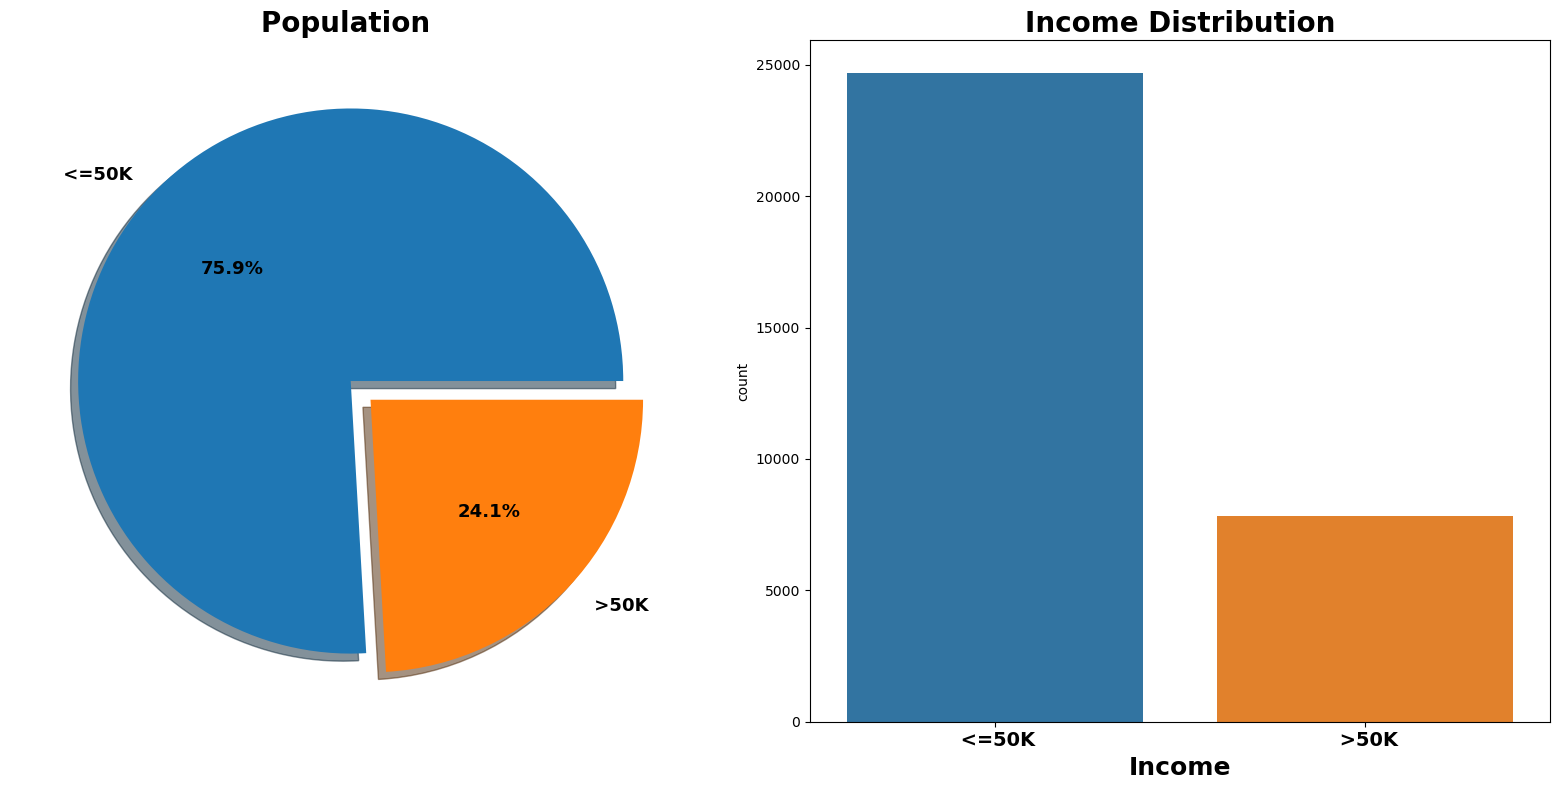

In [16]:

f,ax=plt.subplots(1,2,figsize=(16,8))
df['Income'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Population ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Income',data=df,ax=ax[1])
ax[1].set_title('Income Distribution',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Income",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()
#24697 peoples have income less than 50K.
#target variable income is imbalance

In [17]:
# lets check the salary according to the income and age group 
#as we have already ssen the min age is 17 and maximum age is 90 and average age is 38.58
#we will define one funcution 

In [18]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if (18< x < 31):
        return "19-30"
    if (30 < x < 41):
        return "31-40"
    if (40 < x < 51):
        return "41-50"
    if (50 < x < 61):
        return "51-60"
    if (60 < x < 71):
        return "61-70"
    else:
        return "greater than 70 "

In [19]:
df['age_group'] = df['Age'].apply(age_group)

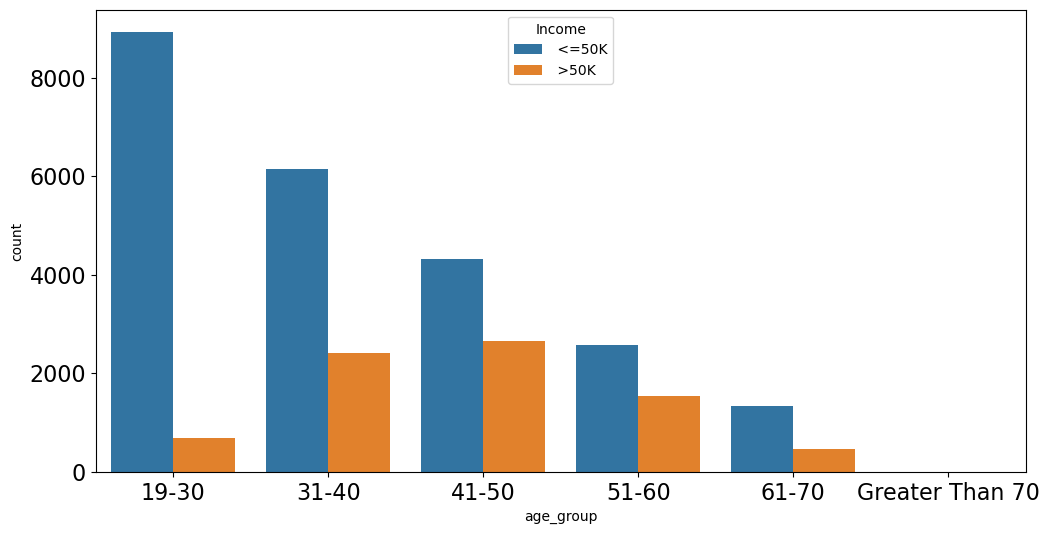

In [20]:
plt.figure(figsize=(12,6))
order_list = ['19-30','31-40','41-50','51-60','61-70','Greater Than 70']
sns.countplot(df['age_group'],hue=df['Income'],order=order_list)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

In [21]:
#almost 10 % people in age group of 19-30 earns more than 50 K dollars
#this count is drop in old peoples having greater than 61
#maximum people earning more than 50K dollors belong to age group 41-50 & 51-60.

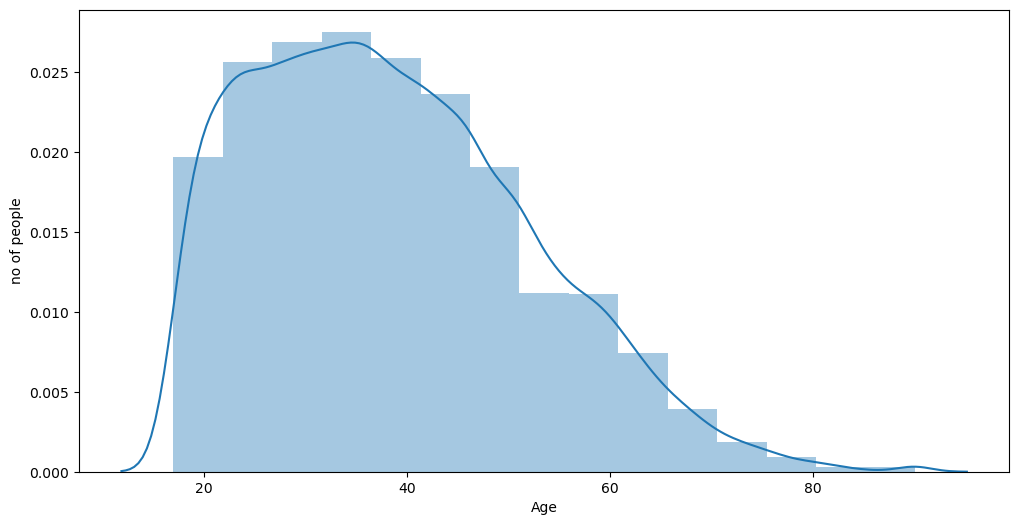

In [22]:
plt.figure(figsize=(12,6))
sns.distplot(df['Age'],bins=15)
plt.xlabel('Age')
plt.ylabel('no of people')
plt.show()
## Creating a distribution plot for 'Age'

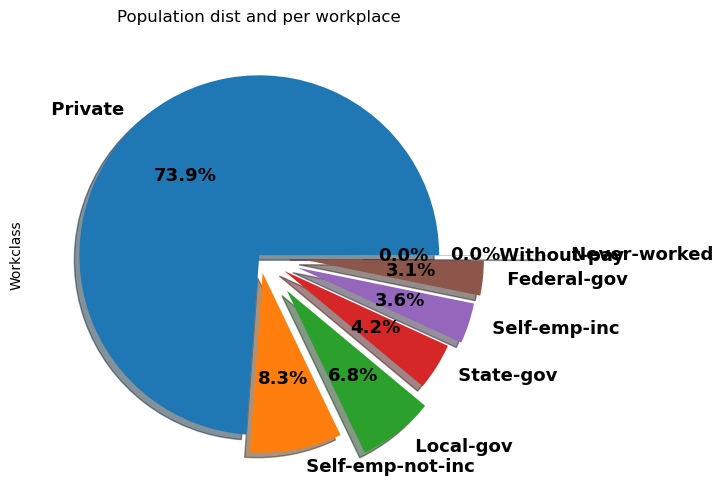

In [23]:
plt.figure(figsize=(10,5))
df['Workclass'].value_counts().plot.pie(explode=[0,0.1,0.25,0.165,0.225,0.25,0.2,0.6], autopct='%2.1f%%',  textprops ={ 'fontweight': 'bold','fontsize':13},shadow=True)
plt.title('Population dist and per workplace')
plt.tight_layout()
plt.show()

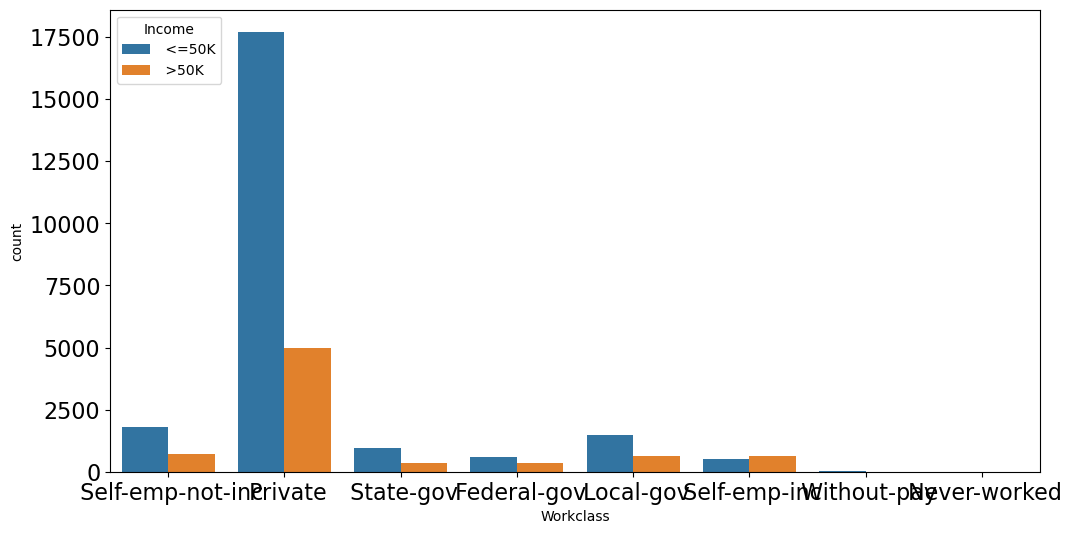

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(df['Workclass'],hue=df['Income'])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

In [25]:
pd.crosstab(df['Income'],df['Workclass'],margins=True)
#highest people belong to Private  sector followed by Self Emplyoed
#self-Employed Incorporated category where the number of people who earn more than 50K dollars exceed those earning less than it
#Federal Goverment countplot where We can see very minute difference between the number of people whose income is more or less than 50K dollars an year.
#state-gov is similarly same 

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Income,,,,,,,,,
<=50K,589,1476,7,17712,494,1816,944,14,23052
>50K,371,617,0,4961,622,724,353,0,7648
All,960,2093,7,22673,1116,2540,1297,14,30700


In [26]:
#we will check education VS income because it also played aIMP role for the same

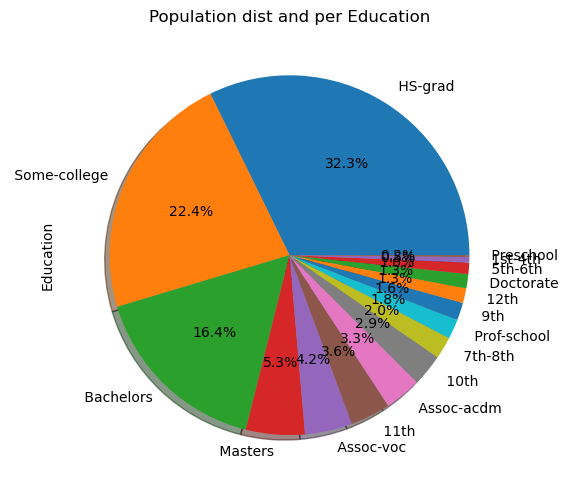

In [27]:
plt.figure(figsize=(10,5))
df['Education'].value_counts().plot.pie( autopct='%2.1f%%',  textprops ={'fontsize':10},shadow=True)
plt.title('Population dist and per Education')
plt.tight_layout()
plt.show()

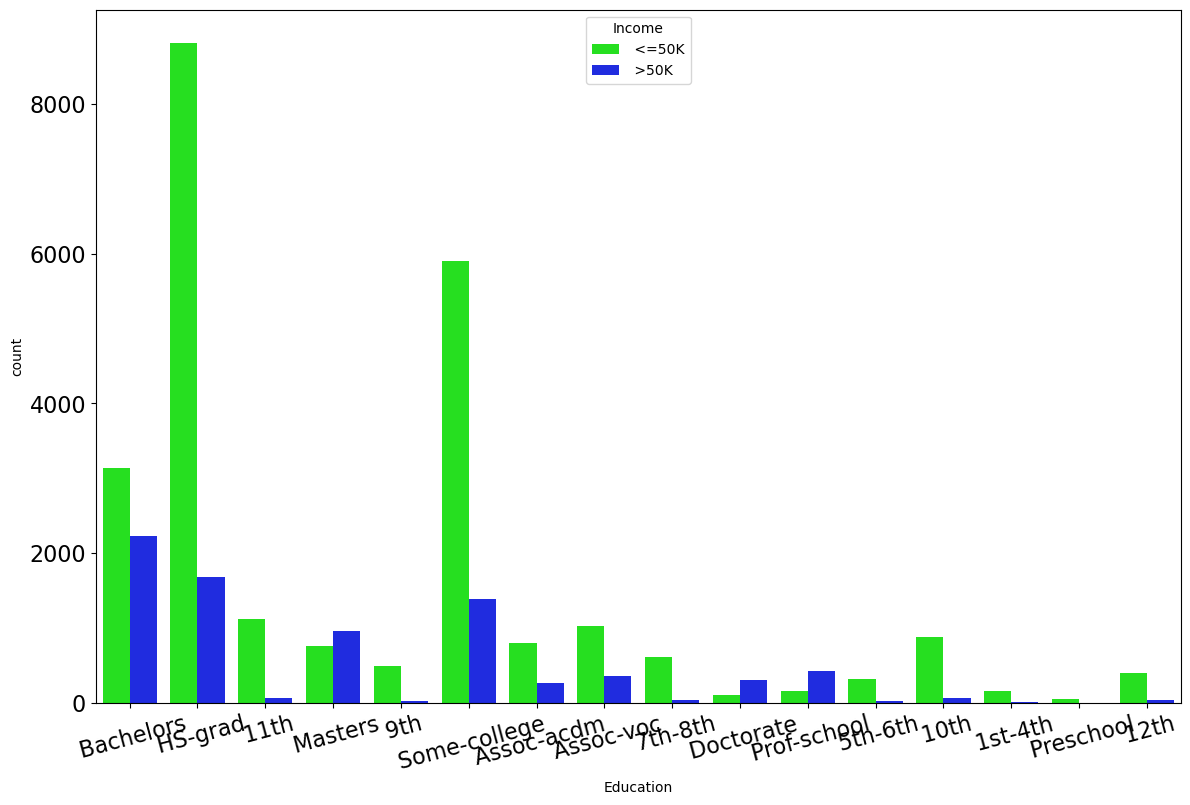

In [28]:
plt.figure(figsize=(14,9))
sns.countplot(df['Education'],hue=df['Income'],palette='hsv')
plt.xticks(fontsize=16,rotation=15)
plt.yticks(fontsize=16)
plt.show()

In [29]:
# 50 k earned is mostly bachelor degree holder
#very less who are uneducated and earn more thean 50 K 
#people with HS-Grad education which is most prevalent education level.
#Assoc-acad or Assoc-voc, very few people who earn more than 50K dollars an year
#5.3 % people with masters and 1.3 % population is Doctorate degree holder.


In [30]:
pd.crosstab(df['Education'],df['Workclass'],margins=True)
# we can see that private sector is highest recuriter for HS-Grad with 8305 people.
#Private sector is also major recurtier of highly eduacated people with masters, doctorate followed by local goverment.

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Education,,,,,,,,,
10th,6,31,2,695,19,67,13,0,833
11th,9,36,1,923,14,60,14,0,1057
12th,5,19,0,333,7,19,10,0,393
1st-4th,0,4,0,134,2,13,1,0,154
5th-6th,1,9,0,265,4,19,4,0,302
7th-8th,2,28,1,423,14,94,10,1,573
9th,3,23,0,387,10,34,6,0,463
Assoc-acdm,55,88,0,729,35,71,41,1,1020
Assoc-voc,38,86,0,1005,38,108,46,0,1321


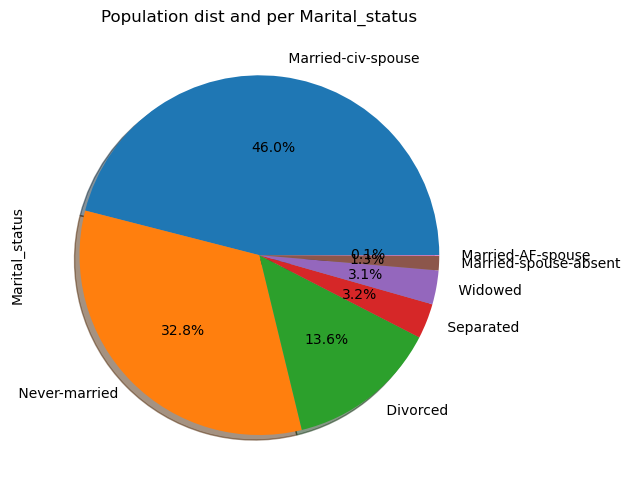

In [31]:
plt.figure(figsize=(10,5))
df['Marital_status'].value_counts().plot.pie( autopct='%2.1f%%',  textprops ={'fontsize':10},shadow=True)
plt.title('Population dist and per Marital_status')
plt.tight_layout()
plt.show()

In [32]:
pd.crosstab(df['Marital_status'],df['Income'],margins=True)
#Married people are most like to earn more than 50K dollars an year.
#Married-civ-spouse is the only category which has comparable number of people belonging to both categories.

Income,<=50K,>50K,All
Marital_status,,,
Divorced,3978,463,4441
Married-AF-spouse,13,10,23
Married-civ-spouse,8280,6690,14970
Married-spouse-absent,384,34,418
Never-married,10175,491,10666
Separated,959,66,1025
Widowed,908,85,993
All,24697,7839,32536


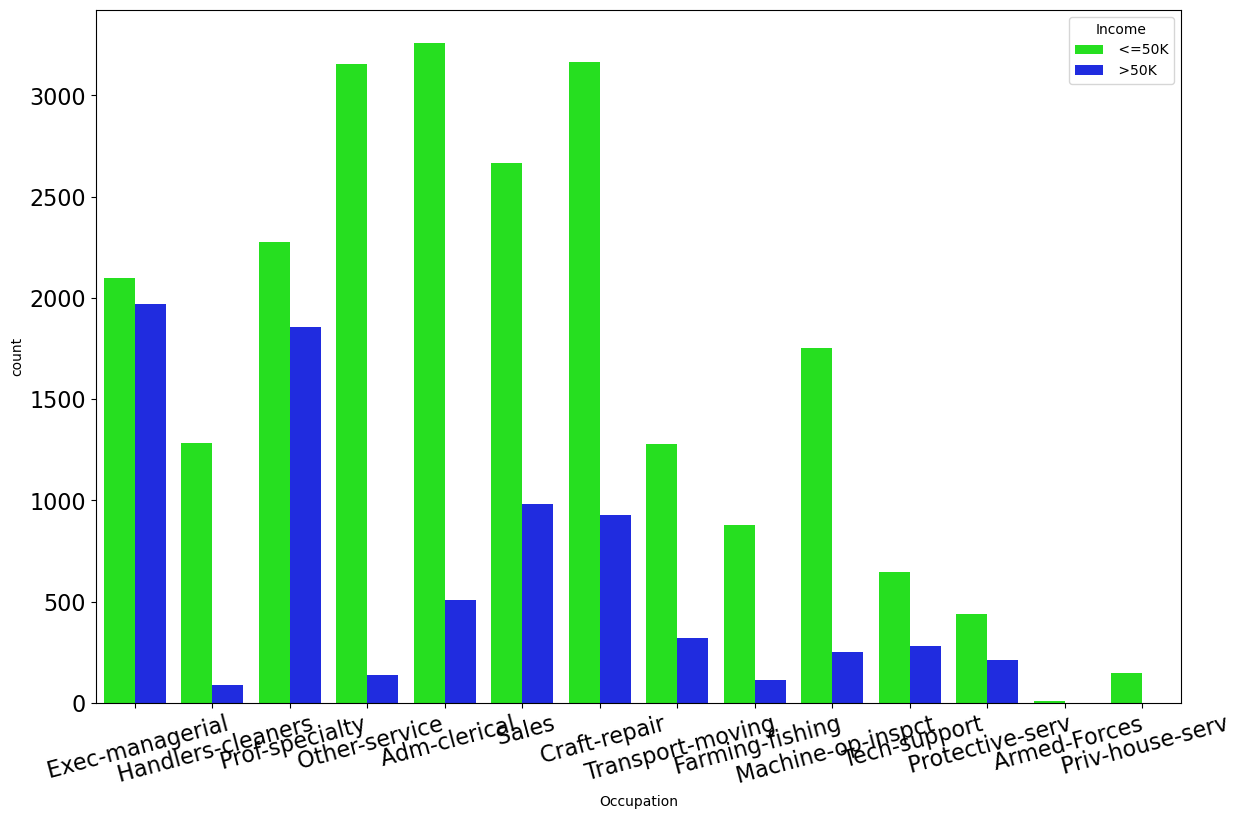

In [33]:
plt.figure(figsize=(14,9))
sns.countplot(df['Occupation'],hue=df['Income'],palette='hsv')
plt.xticks(fontsize=16,rotation=15)
plt.yticks(fontsize=16)
plt.show()

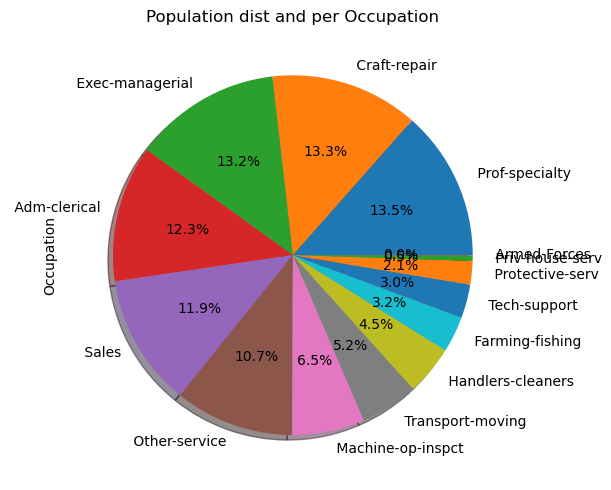

In [34]:
plt.figure(figsize=(10,5))
df['Occupation'].value_counts().plot.pie( autopct='%2.1f%%',  textprops ={'fontsize':10},shadow=True)
plt.title('Population dist and per Occupation')
plt.tight_layout()
plt.show()

In [35]:
# people working in Sales earn more than 50K dollars an year.
#Arm- Forces, Farming-fishing, Machine-op-inspect, Other-service, Adm-clerical, Handlers-cleaners are very less likely to earn more than 50K dollars an year.
#-managerial role are equally likely to earn more than 50K dollars an year.

In [36]:
pd.crosstab(df['Occupation'],df['Income'],margins=True)
#there are high chances adult in Prof-specialty to earn more than 50K dollars an year.
#Exective Managerial position have high  chances to lead in Greater than 50K dollars Club.

Income,<=50K,>50K,All
Occupation,,,
Adm-clerical,3260,507,3767
Armed-Forces,8,1,9
Craft-repair,3165,929,4094
Exec-managerial,2097,1968,4065
Farming-fishing,877,115,992
Handlers-cleaners,1283,86,1369
Machine-op-inspct,1751,249,2000
Other-service,3154,137,3291
Priv-house-serv,146,1,147


In [37]:
#Let check where these different occupation fit with respect to Work class through crosstab.
pd.crosstab(df['Occupation'],df['Workclass'],margins=True)
# Without pay workclass we find 6 peoples with Exec-Managerial. Possibly they are working with unpaid work for experience.

Workclass,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Occupation,,,,,,,,
Adm-clerical,317,283,2831,31,50,252,3,3767
Armed-Forces,9,0,0,0,0,0,0,9
Craft-repair,64,146,3191,106,530,56,1,4094
Exec-managerial,180,214,2690,400,392,189,0,4065
Farming-fishing,8,29,453,51,430,15,6,992
Handlers-cleaners,23,47,1272,2,15,9,1,1369
Machine-op-inspct,14,12,1911,13,36,13,1,2000
Other-service,35,193,2736,27,175,124,1,3291
Priv-house-serv,0,0,147,0,0,0,0,147


In [38]:
#we can check relationship vs income

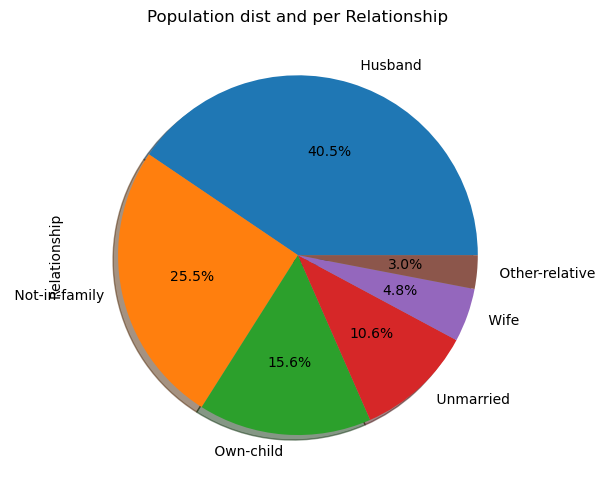

In [39]:
plt.figure(figsize=(10,5))
df['Relationship'].value_counts().plot.pie( autopct='%2.1f%%',  textprops ={'fontsize':10},shadow=True)
plt.title('Population dist and per Relationship')
plt.tight_layout()
plt.show()

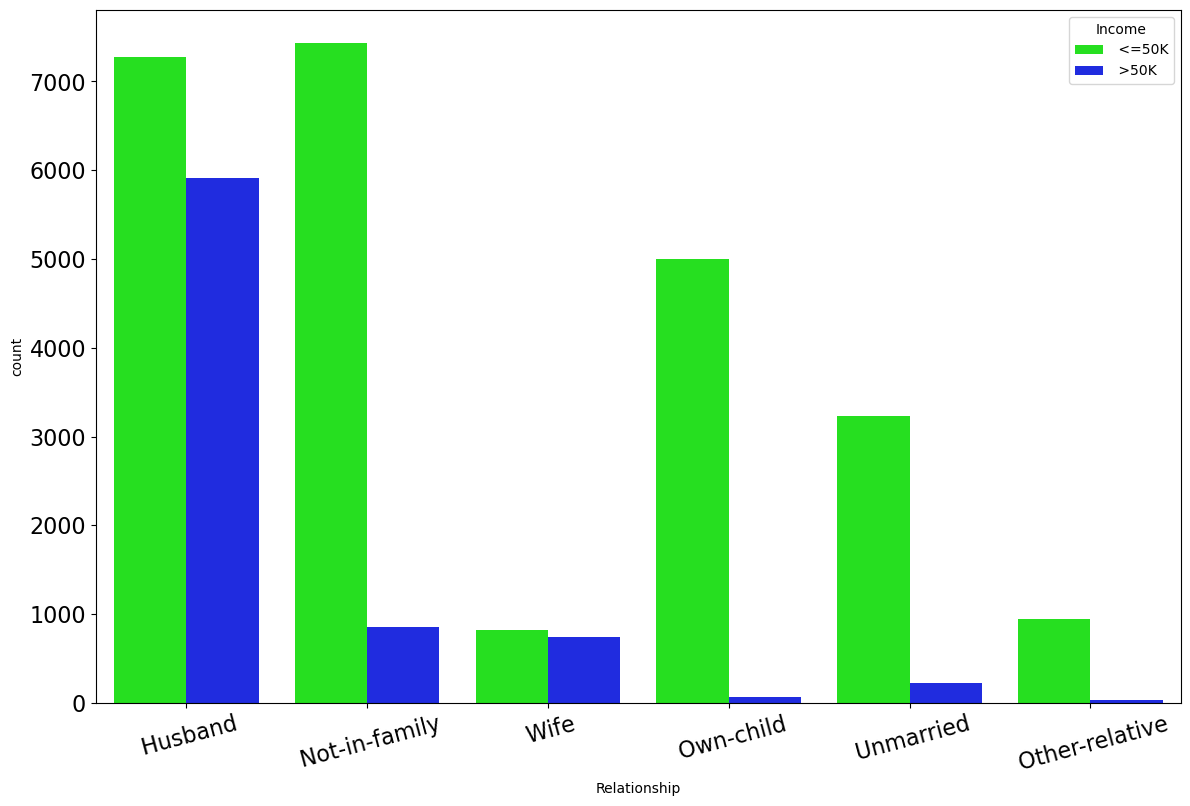

In [40]:
plt.figure(figsize=(14,9))
sns.countplot(df['Relationship'],hue=df['Income'],palette='hsv')
plt.xticks(fontsize=16,rotation=15)
plt.yticks(fontsize=16)
plt.show()

In [41]:
#Wives are equally likely to earn more than 50K dollars an year.
#For Husbands , there is less possibility of them to earn more than 50K dollars an year.
#handful of Unmarried people earning more than 50K dollars an year.

In [42]:
#sex vs income

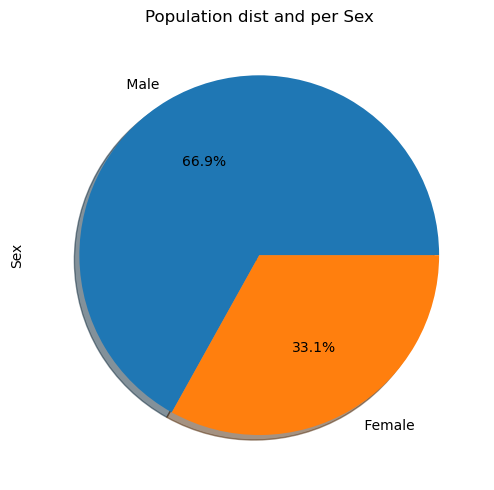

In [43]:
plt.figure(figsize=(10,5))
df['Sex'].value_counts().plot.pie( autopct='%2.1f%%',  textprops ={'fontsize':10},shadow=True)
plt.title('Population dist and per Sex')
plt.tight_layout()
plt.show()

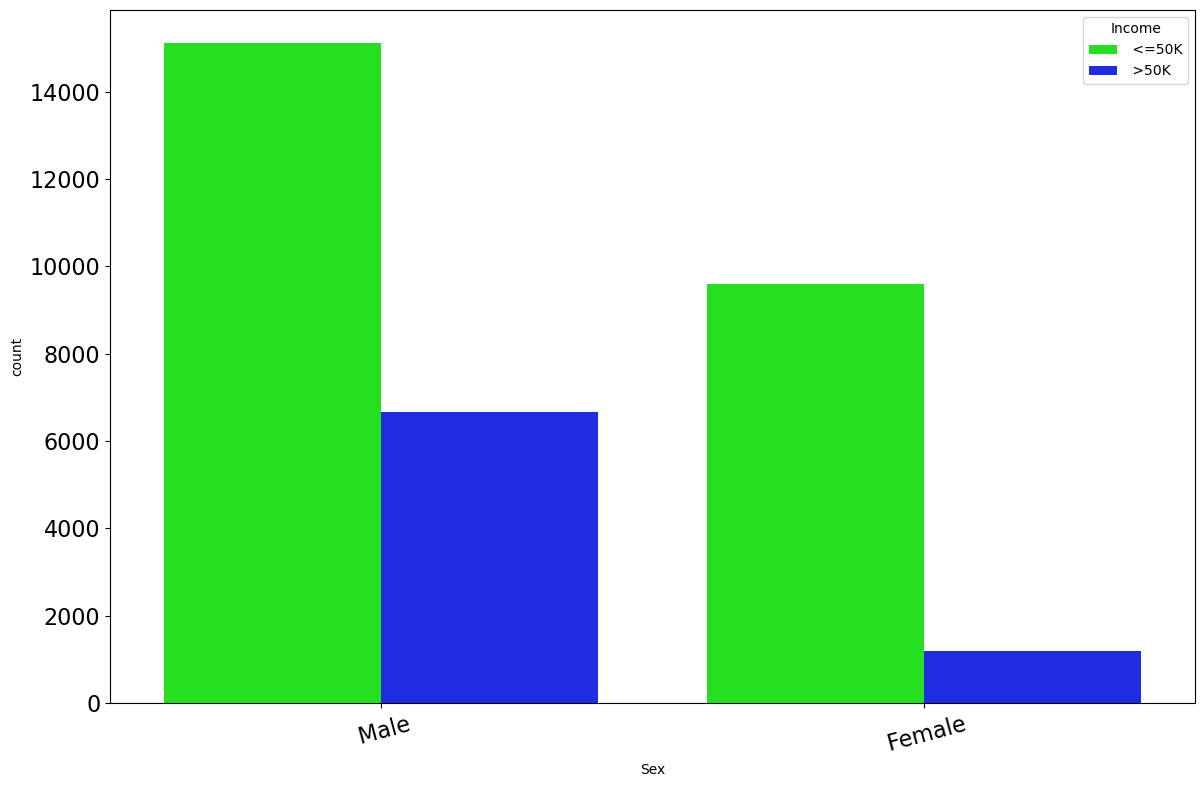

In [44]:
plt.figure(figsize=(14,9))
sns.countplot(df['Sex'],hue=df['Income'],palette='hsv')
plt.xticks(fontsize=16,rotation=15)
plt.yticks(fontsize=16)
plt.show()

In [45]:
#gap between male and female earnings.
#Women in Greater Than 50K Dollar Club less than 15 %
#more than 30 % man earning 50k

In [46]:
pd.crosstab(df['Occupation'],[df.Sex,df.Income],margins=True)

Sex                 Female         Male          All
Income               <=50K  >50K  <=50K  >50K       
Occupation                                          
 Adm-clerical         2323   212    937   295   3767
 Armed-Forces            0     0      8     1      9
 Craft-repair          202    20   2963   909   4094
 Exec-managerial       879   280   1218  1688   4065
 Farming-fishing        63     2    814   113    992
 Handlers-cleaners     160     4   1123    82   1369
 Machine-op-inspct     529    20   1222   229   2000
 Other-service        1748    51   1406    86   3291
 Priv-house-serv       138     1      8     0    147
 Prof-specialty       1128   385   1150  1473   4136
 Protective-serv        66    10    372   201    649
 Sales                1175    88   1492   895   3650
 Tech-support          302    45    342   238    927
 Transport-moving       81     9   1196   311   1597
All                   8794  1127  14251  6521  30693

In [47]:
#most of females work in Adm-clerical,Other-service,Prof-specialty.
#Men Maximum number in Greater than 50K dollars Club in females comes from Prof-speciality,Exec-Managerial profession.
#Maximum men work in Prof-Specialty.

In [48]:
#Race vs distribution

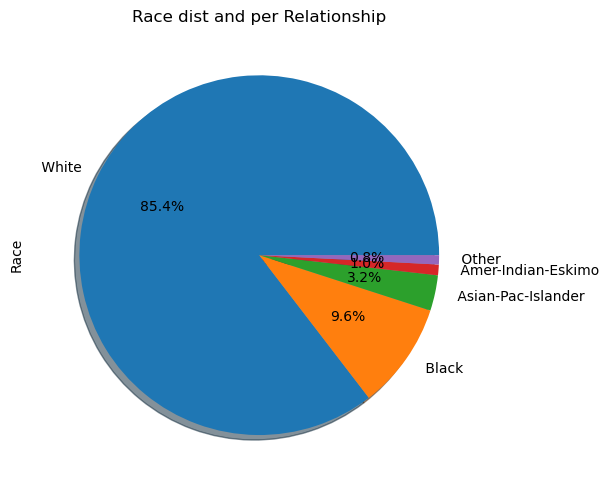

In [49]:
plt.figure(figsize=(10,5))
df['Race'].value_counts().plot.pie( autopct='%2.1f%%',  textprops ={'fontsize':10},shadow=True)
plt.title('Race dist and per Relationship')
plt.tight_layout()
plt.show()

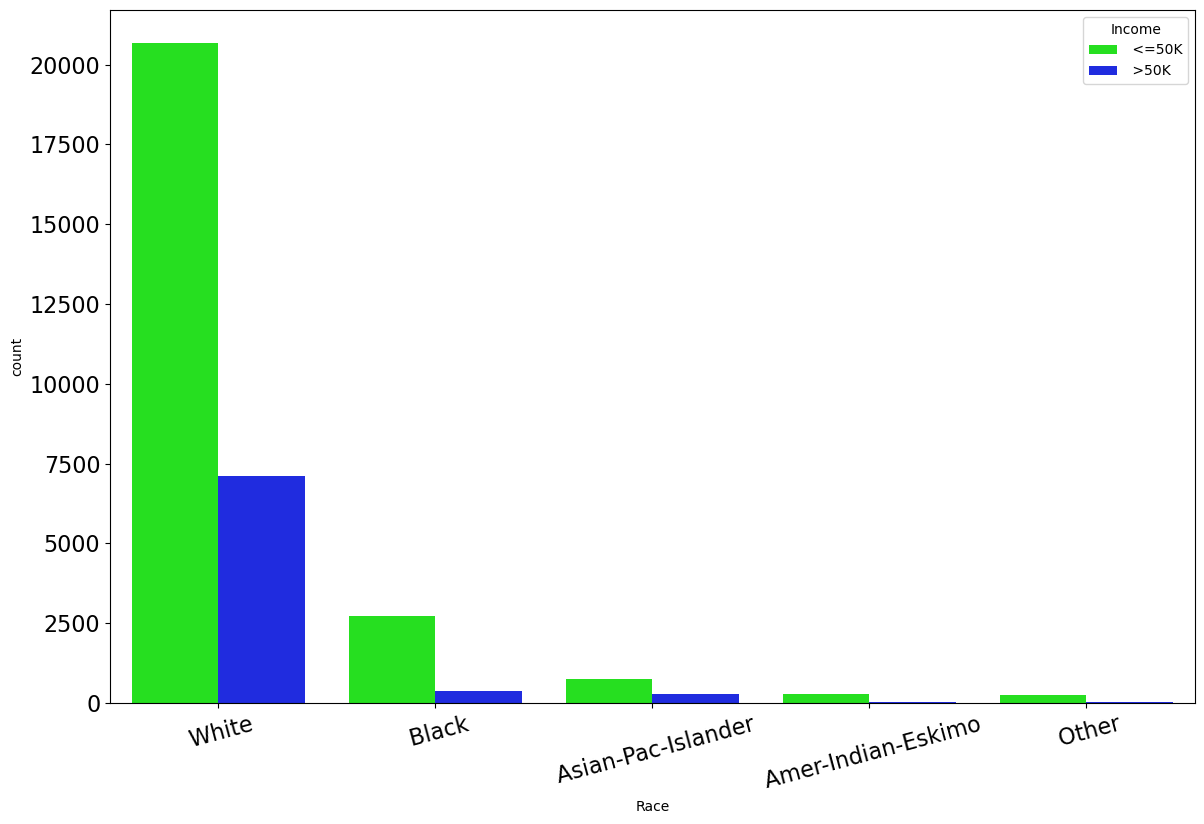

In [50]:
plt.figure(figsize=(14,9))
sns.countplot(df['Race'],hue=df['Income'],palette='hsv')
plt.xticks(fontsize=16,rotation=15)
plt.yticks(fontsize=16)
plt.show()

In [51]:
#most of the people are whites followed by black 
#Maximum peoples in Greater than 50K Club are White.

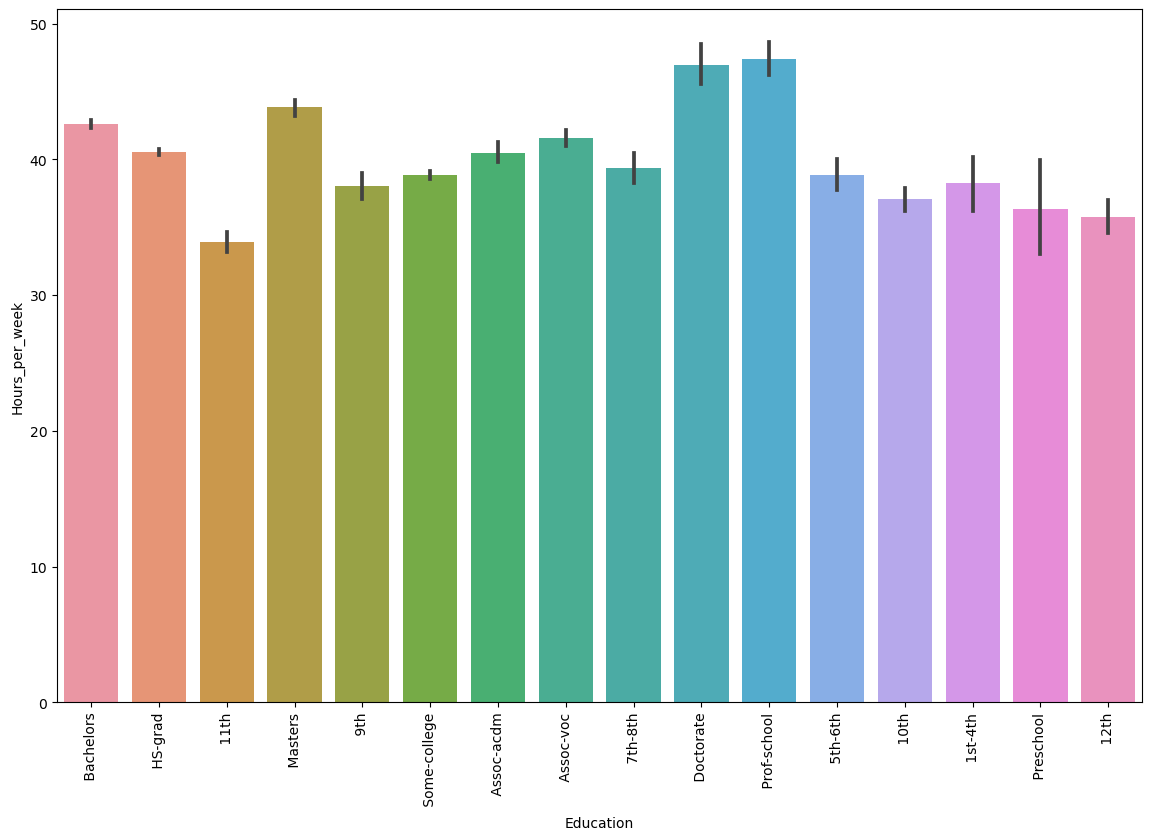

In [52]:
plt.figure(figsize=(14,9))
abc = sns.barplot(x=df['Education'],y=df['Hours_per_week'],data=df)
plt.setp(abc.get_xticklabels(), rotation=90)
plt.show()
# This shows the hours per week according to the education of the person

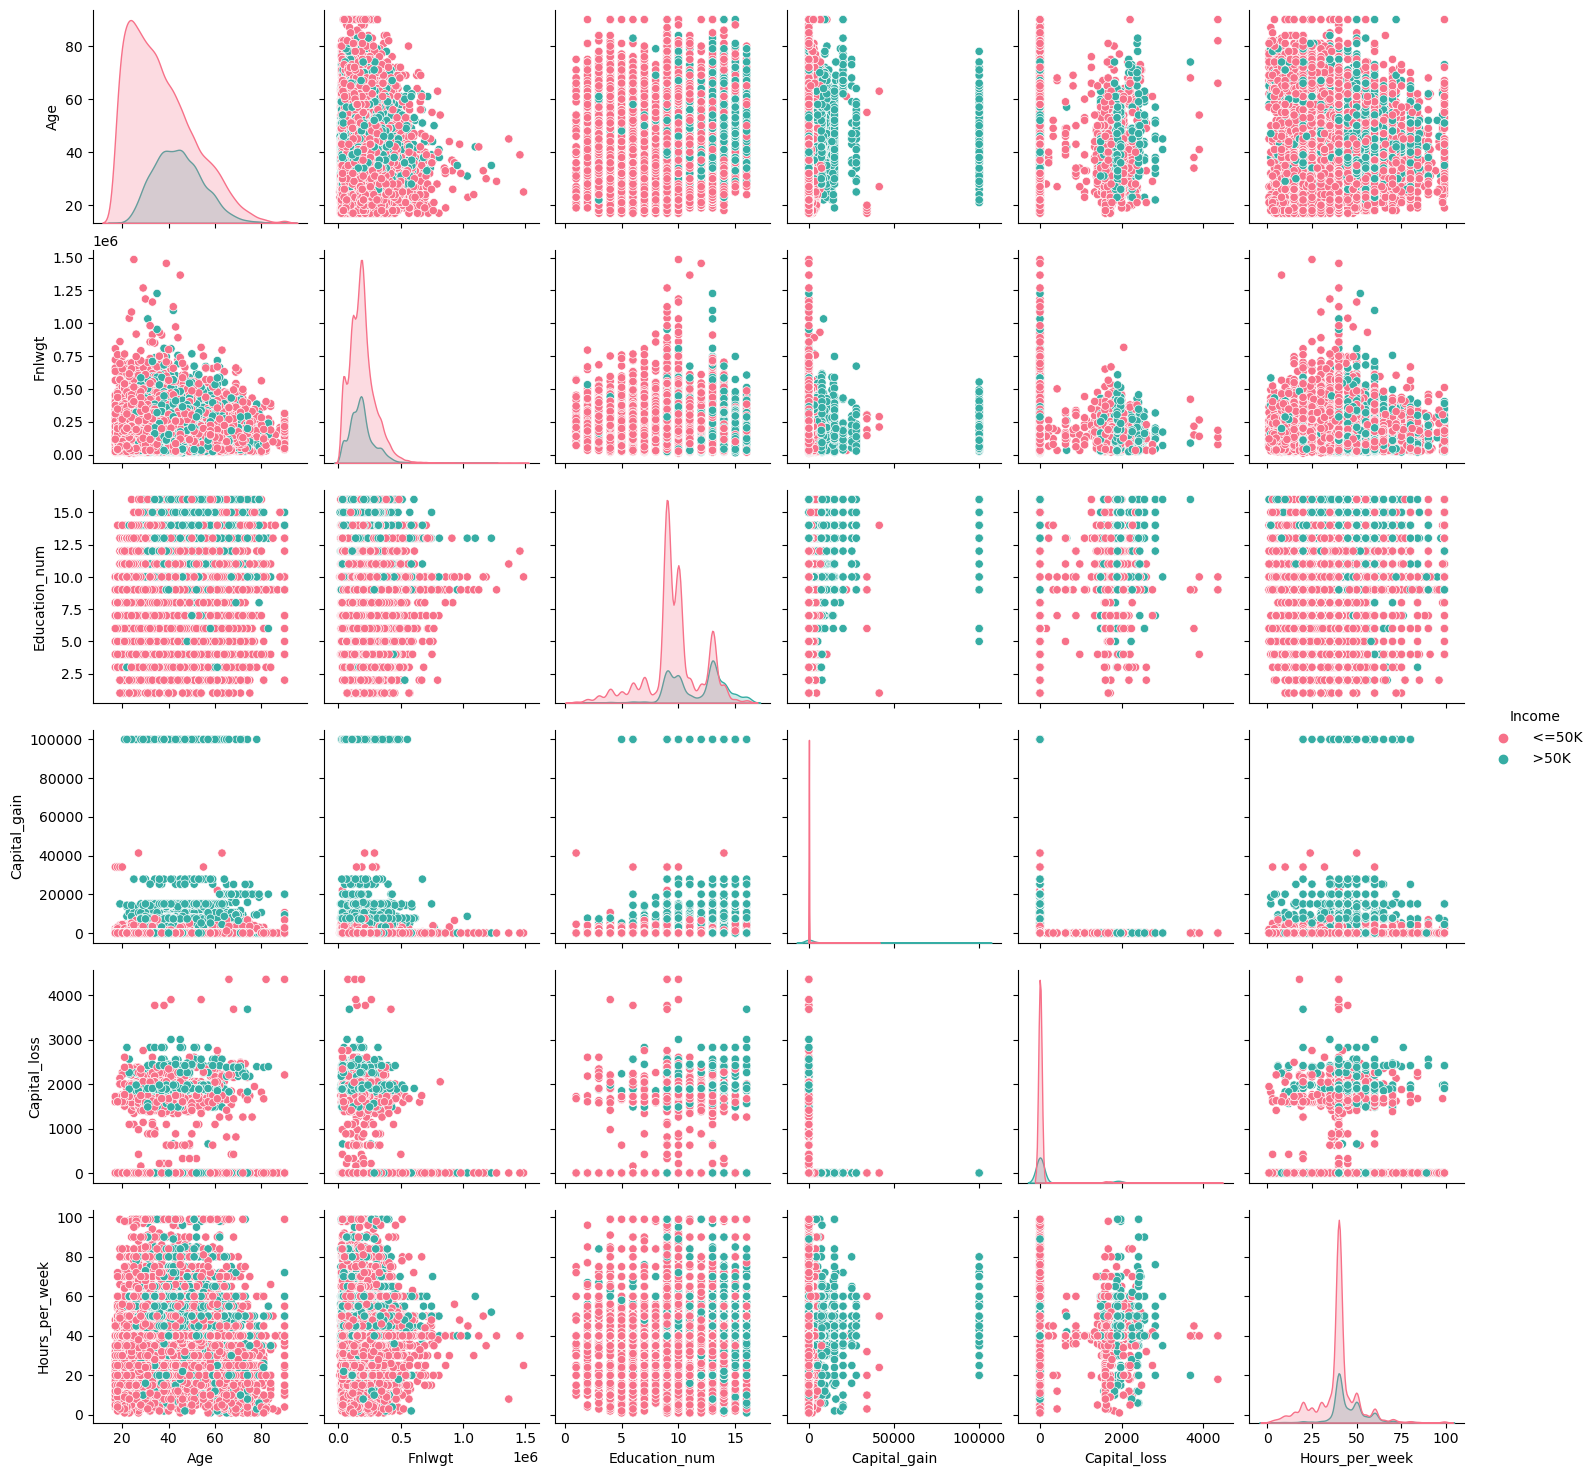

In [53]:
# Checking the pairwise relation in the dataset.
sns.pairplot(df,hue="Income",palette="husl")

In [54]:
df.head()
#now first will change value to check outlier and model prediction 

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,age_group
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,41-50
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,31-40
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,51-60
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,19-30
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,31-40


In [55]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le  = LabelEncoder()
for i in Category:
    df[i]= le.fit_transform(df[i])
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,age_group
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0,41-50
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0,31-40
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0,51-60
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0,19-30
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0,31-40


In [56]:
#now data has been changed

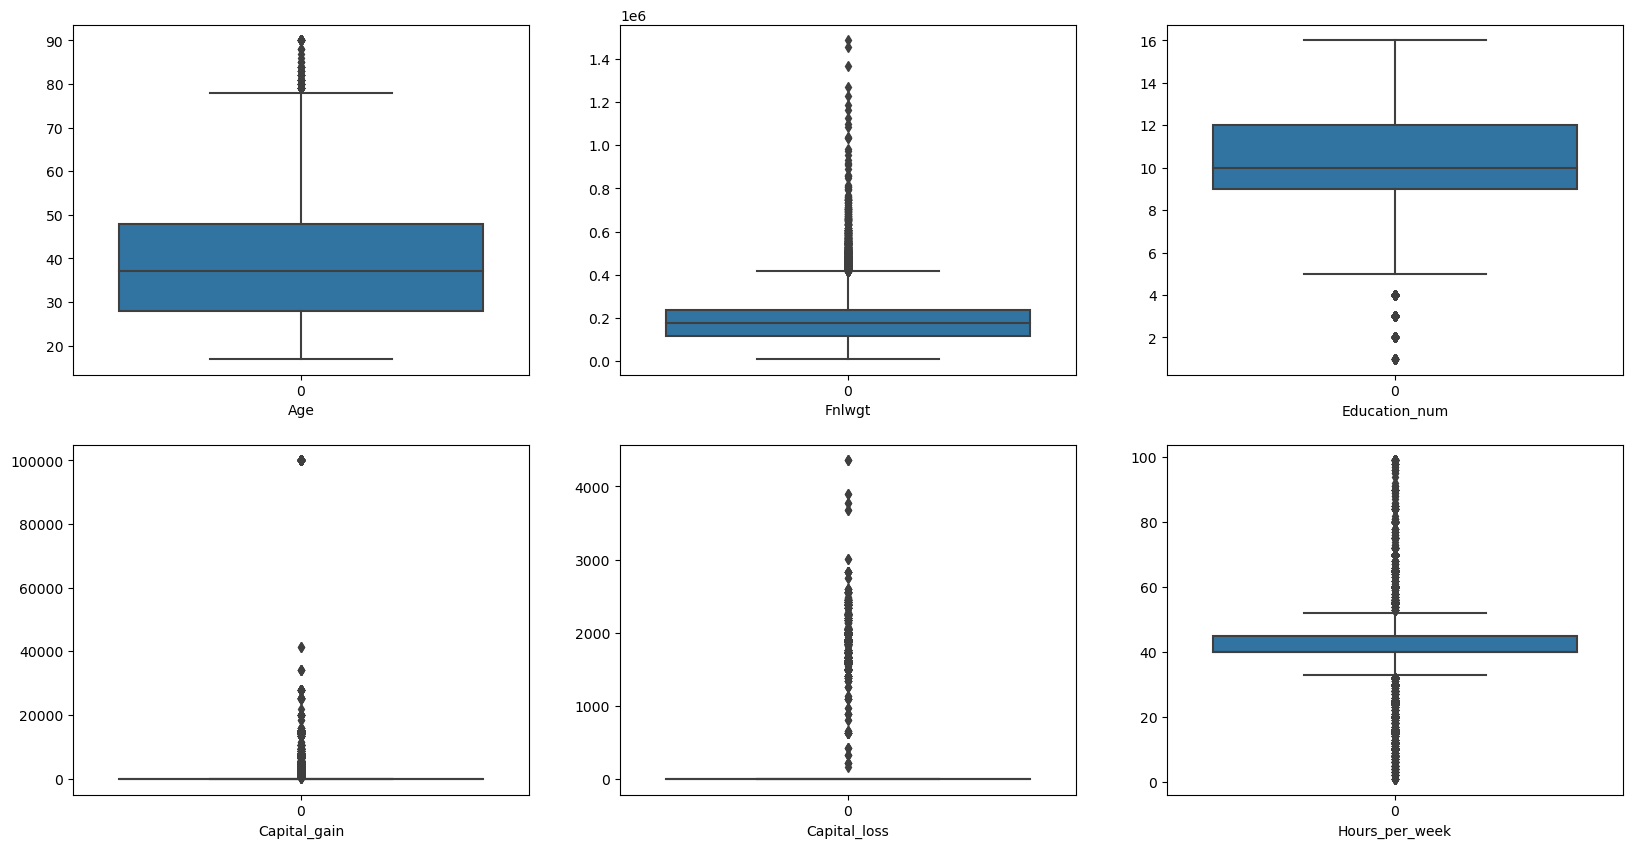

In [57]:
plt.figure(figsize=(20,10))

plotnumber = 1

for c in Numerical:
    if plotnumber <=8:
        ax = plt.subplot(2,3,plotnumber)
        sns.boxplot(data=df[c])
        plt.xlabel(c)
        
    plotnumber+=1
#From Boxplot we can see outliers exist dataset.

In [58]:
df.drop(["Fnlwgt", "Education"],axis=1,inplace=True)
# dropping this Fnlwgt because uncessary columns and  Education is similar to Education_num its in garde and Education is in name 

In [64]:
df.drop(['age_group'],axis=1,inplace=True)

In [65]:

from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]
#outlier removing method 

In [67]:
df.shape
#without treating outlier

(32536, 13)

In [71]:
df1.shape
#after treating the outlier

(28074, 13)

In [73]:
df=df1.copy()
#copy the data to orignial DF

(28074, 13)

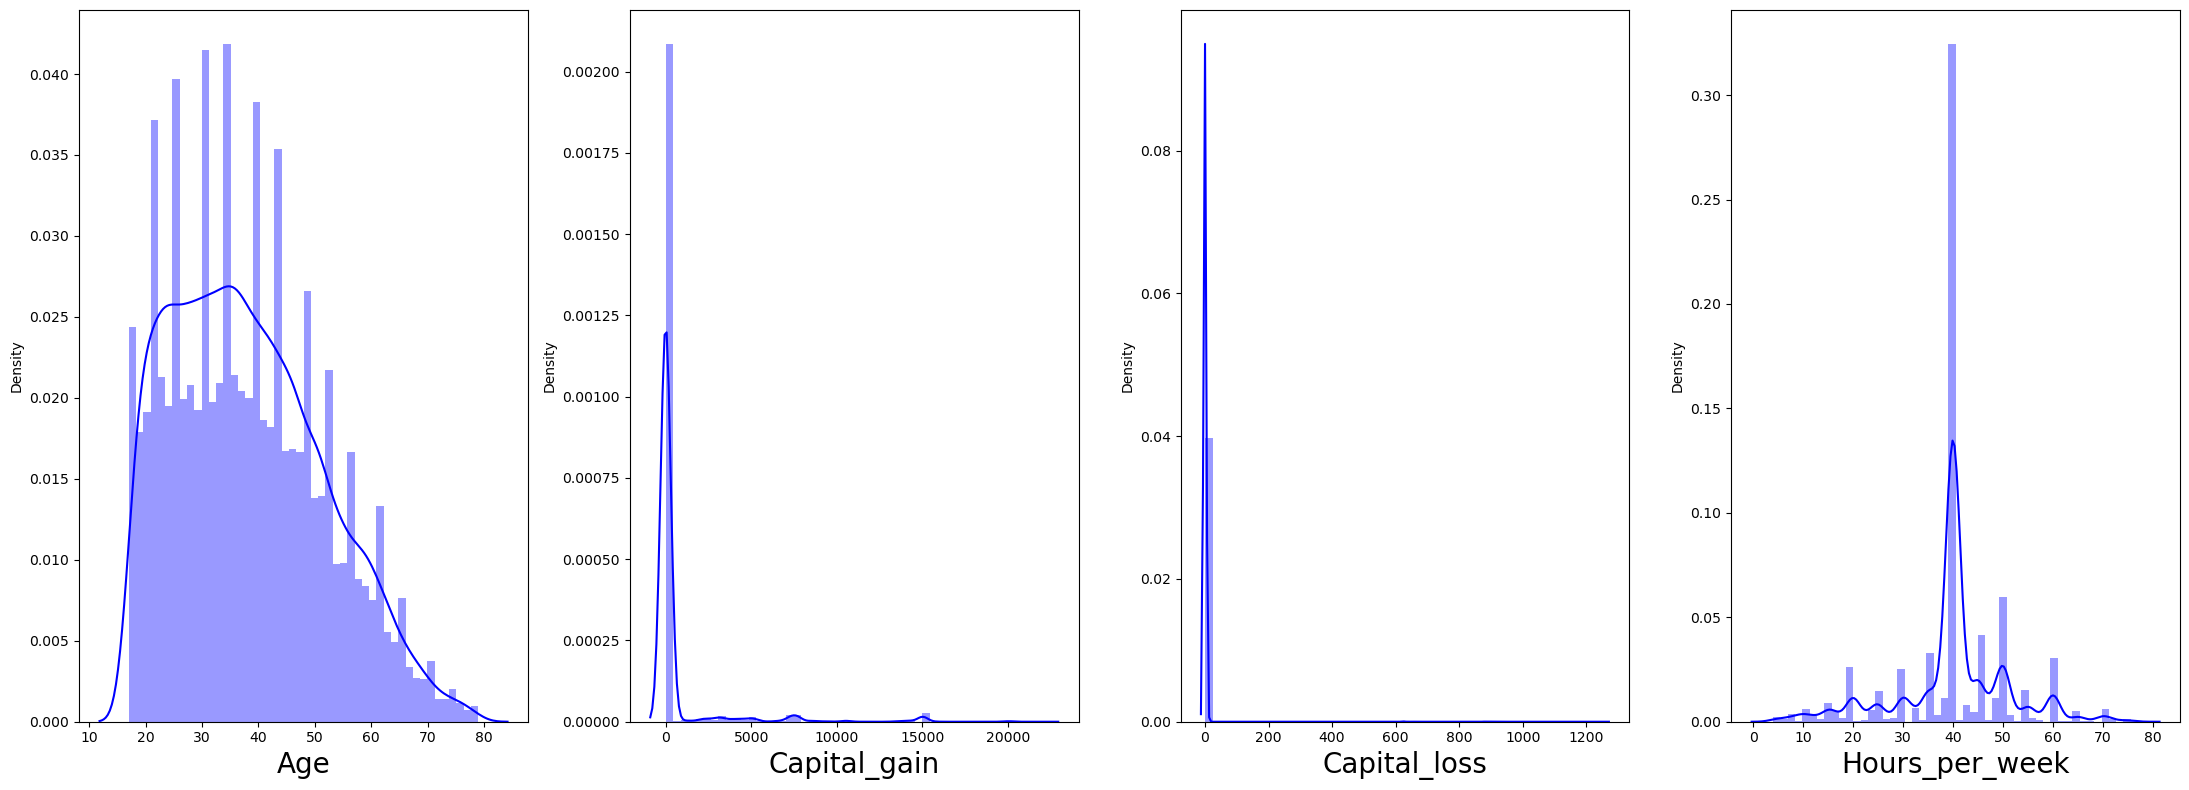

In [77]:
plt.figure(figsize=(22,8),facecolor='white')
plotnumber=1
for col in df[['Age','Capital_gain','Capital_loss','Hours_per_week']]:
    if plotnumber<=4:
        ax=plt.subplot(1,4,plotnumber)
        sns.distplot(df[col],color='b')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [78]:
df.skew()

Age                0.487919
Workclass          1.184214
Education_num     -0.147568
Marital_status    -0.046476
Occupation         0.136710
Relationship       0.751671
Race              -2.549433
Sex               -0.689872
Capital_gain       4.925018
Capital_loss      29.676186
Hours_per_week    -0.359251
Native_country    -5.126268
Income             1.322727
dtype: float64

In [79]:
#as we can see skewness in data set that we have to treat the same 
#Relationship,Sex,Native_country,Income are skewed but as they are categorical concept of skewness doesnot mean anything to it.
#Capital_gain and Capital_loss are numeric variable with lot of zero and high number So skewness exist in them.
#no point in transforming it because at end data will be skewed.

<AxesSubplot:>

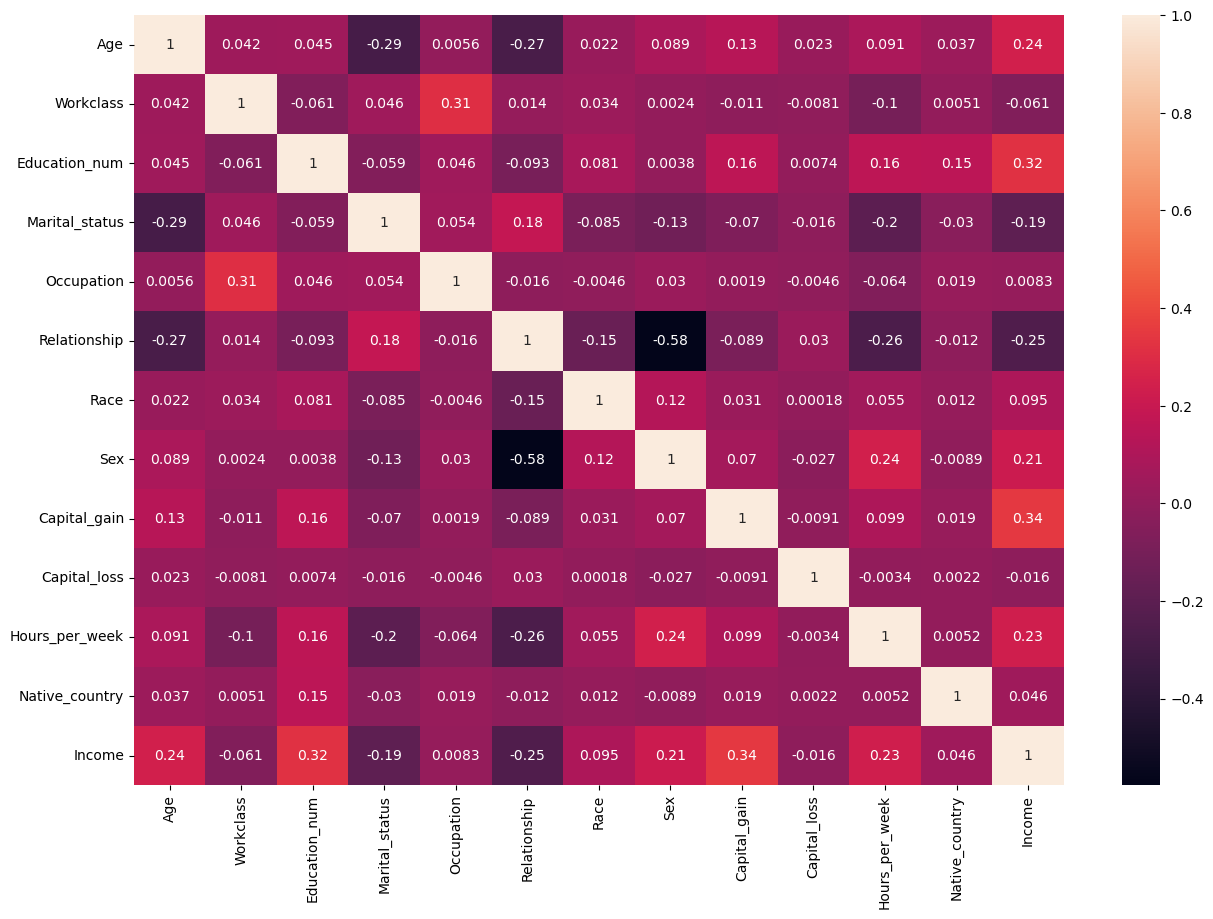

In [80]:
df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

#looking at the correlation plot, only Credit_History is the only feature which is adding value to target variable

In [81]:
#Between input features maximum correlation of -0.557 exist between sex and relationship.
#Capital gain is highly correlated with target variable.
#Capital loss and workclass,occupation, native country, race correlated with target variable
# will check PCA then will decide

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif
#His will not work here as most of input features are correlated with each other either moderated or poorly.
#Multicollinerity is to Scaled Data and then apply PCA will do with this way .

,VIF,Features
0,10.495859,Age
1,6.230986,Workclass
2,21.292442,Education_num
3,4.371260,Marital_status
4,3.521261,Occupation
5,2.938899,Relationship
6,35.878044,Race
7,4.552328,Sex
8,1.209536,Capital_gain
9,1.004278,Capital_loss


In [83]:
df.Income.value_counts()
#As Target variable data is Imbalanced in nature we will need to balance target variable.

0    21780
1     6294
Name: Income, dtype: int64

In [84]:
from imblearn.over_sampling import SMOTE

In [85]:
x = df.drop(['Income'],axis=1)
y = df['Income']

In [86]:
oversample = SMOTE()
x,y=oversample.fit_resample(x,y)

In [87]:
y.value_counts()
#We have successfully resolved the class imbalanced problem 

0    21780
1    21780
Name: Income, dtype: int64

In [88]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

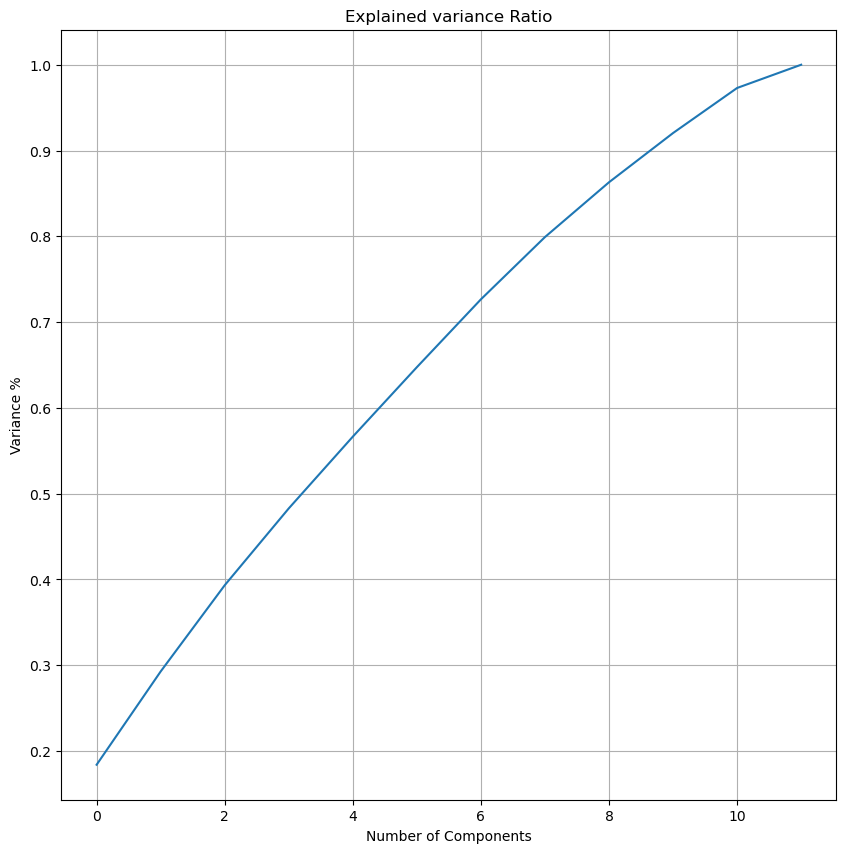

In [90]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(x_scaler)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_) )
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

In [91]:
#AS per the graph, we can see that 9 principal components attribute for 90% of variation in the data. 
#We will  pick the first 9 components for our prediction.

pca_new = PCA(n_components=9)
x_new = pca_new.fit_transform(x_scaler)
#9 feature taken

In [93]:
x_new=pd.DataFrame(x_new,columns=np.arange(9))


In [94]:
#train test split , splitting the data 
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=12)

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
from sklearn.model_selection import cross_val_score
#all the necassary liabraries that required for building a model

In [101]:
# defined a funcution 
def metric_score(clf,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(x_train)
        
        
        print('============trainresult===============')
        
        print(f'accuracy_score{accuracy_score(y_train,y_pred) *  100:.2f}%' )
        
    elif train == False:
        
        pred = clf.predict(x_test)
        
        print('============testresult===============')
        
        print(f'accuracy_score {accuracy_score(y_test,pred)* 100:.2f}%')
        
        print(classification_report(y_test,pred,digits = 2))

In [102]:
#creating an object of logistic regression model
log = LogisticRegression()

log.fit(x_train,y_train)
y_pred = log.predict_proba(x_test)
y_pred

array([[0.25526654, 0.74473346],
       [0.08221469, 0.91778531],
       [0.78609788, 0.21390212],
       ...,
       [0.35811579, 0.64188421],
       [0.07611317, 0.92388683],
       [0.54388158, 0.45611842]])

In [103]:
metric_score(log,x_train,x_test,y_train,y_test,train = True)
metric_score(log,x_train,x_test,y_train,y_test,train = False)

============trainresult===============
accuracy_score76.97%
============testresult===============
accuracy_score 76.91%
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      4278
           1       0.77      0.78      0.78      4434

    accuracy                           0.77      8712
   macro avg       0.77      0.77      0.77      8712
weighted avg       0.77      0.77      0.77      8712



In [104]:
cv_score = (cross_val_score(log, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check 

Cross Validation Score: 75.68181818181819


In [105]:
#DecisionTreeClassifier model
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict_proba(x_test)
y_pred

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [106]:
metric_score(clf,x_train,x_test,y_train,y_test,train = True)
metric_score(clf,x_train,x_test,y_train,y_test,train = False)

============trainresult===============
accuracy_score97.06%
============testresult===============
accuracy_score 82.56%
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      4278
           1       0.82      0.85      0.83      4434

    accuracy                           0.83      8712
   macro avg       0.83      0.83      0.83      8712
weighted avg       0.83      0.83      0.83      8712



In [107]:
cv_score = (cross_val_score(clf, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check 

Cross Validation Score: 85.4384756657484


In [108]:
#hyper parameter tunning 
grid_params = {'criterion':['gini','entropy'],
              'max_depth':range(12,15),
              'min_samples_leaf':range(4,6),
              'min_samples_split':range(3,5),
              'max_leaf_nodes':range(5,10)}

grid = GridSearchCV(estimator=clf,
                   param_grid = grid_params,
                   cv = 5)


In [109]:
#time to train the data for best paraam and get best out of it
grid.fit(x_train,y_train)
best = grid.best_params_
best

{'criterion': 'gini',
 'max_depth': 12,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 4,
 'min_samples_split': 3}

In [110]:
d_t = DecisionTreeClassifier(criterion= 'gini', max_depth= 12,max_leaf_nodes=9 ,min_samples_leaf= 4,min_samples_split=3)
d_t.fit(x_train,y_train)
#best params and traning data

DecisionTreeClassifier(max_depth=12, max_leaf_nodes=9, min_samples_leaf=4,
                       min_samples_split=3)

In [111]:
metric_score(d_t,x_train,x_test,y_train,y_test,train = True)
metric_score(d_t,x_train,x_test,y_train,y_test,train = False)
#afterbest params result got better DecisionTreeClassifier

============trainresult===============
accuracy_score78.61%
============testresult===============
accuracy_score 78.13%
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      4278
           1       0.77      0.82      0.79      4434

    accuracy                           0.78      8712
   macro avg       0.78      0.78      0.78      8712
weighted avg       0.78      0.78      0.78      8712



In [112]:
#RandomForestClassifier model
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predict = RFC.predict(x_test)
predict

#Created the Random Forest Classifier Model and checked for it's evaluation metrics.

array([1, 1, 0, ..., 1, 1, 0])

In [113]:
metric_score(RFC,x_train,x_test,y_train,y_test,train = True)
metric_score(RFC,x_train,x_test,y_train,y_test,train = False)

============trainresult===============
accuracy_score97.06%
============testresult===============
accuracy_score 86.13%
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      4278
           1       0.85      0.89      0.87      4434

    accuracy                           0.86      8712
   macro avg       0.86      0.86      0.86      8712
weighted avg       0.86      0.86      0.86      8712



In [114]:
cv_score = (cross_val_score(RFC, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check  

Cross Validation Score: 88.28741965105603


In [115]:
#hyper parameter tunning 
grid_params = {'criterion':['gini','entropy'],
              'max_depth':range(12,15),
              'min_samples_leaf':range(4,6),
              'min_samples_split':range(3,5),
              'max_leaf_nodes':range(5,10)}

grid = GridSearchCV(estimator=clf,
                   param_grid = grid_params,
                   cv = 5)

In [116]:
#time to train the data for best paraam and get best out of it
grid.fit(x_train,y_train)
best = grid.best_params_
best

{'criterion': 'gini',
 'max_depth': 12,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 4,
 'min_samples_split': 3}

In [117]:
RF = RandomForestClassifier(criterion= 'gini', max_depth= 12,max_leaf_nodes=9 ,min_samples_leaf= 4,min_samples_split=3)
RF.fit(x_train,y_train)
#best params and traning data

RandomForestClassifier(max_depth=12, max_leaf_nodes=9, min_samples_leaf=4,
                       min_samples_split=3)

In [118]:
metric_score(RF,x_train,x_test,y_train,y_test,train = True)
metric_score(RF,x_train,x_test,y_train,y_test,train = False)
#afterbest params result got better RandomForestClassifier

============trainresult===============
accuracy_score79.00%
============testresult===============
accuracy_score 78.58%
              precision    recall  f1-score   support

           0       0.80      0.75      0.77      4278
           1       0.77      0.82      0.80      4434

    accuracy                           0.79      8712
   macro avg       0.79      0.79      0.79      8712
weighted avg       0.79      0.79      0.79      8712



In [129]:
# KNeighborsClassifier model
KNC = KNeighborsClassifier(n_neighbors=15)
KNC.fit(x_train,y_train)
y_pred = log.predict_proba(x_test)
y_pred
#Created the K Neighbors Classifier Model and checked for it's evaluation metrics.
# tried with many numbers n_neighbors but getting best accurancy with hence done ith that

array([[0.25526654, 0.74473346],
       [0.08221469, 0.91778531],
       [0.78609788, 0.21390212],
       ...,
       [0.35811579, 0.64188421],
       [0.07611317, 0.92388683],
       [0.54388158, 0.45611842]])

In [130]:
metric_score(KNC,x_train,x_test,y_train,y_test,train = True)
metric_score(KNC,x_train,x_test,y_train,y_test,train = False)

============trainresult===============
accuracy_score85.52%
============testresult===============
accuracy_score 83.49%
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      4278
           1       0.81      0.88      0.85      4434

    accuracy                           0.83      8712
   macro avg       0.84      0.83      0.83      8712
weighted avg       0.84      0.83      0.83      8712



In [131]:
cv_score = (cross_val_score(KNC, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check

Cross Validation Score: 83.4504132231405


In [133]:
# GradientBoostingClassifier model
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
y_pred = GBC.predict_proba(x_test)
y_pred

array([[0.15310458, 0.84689542],
       [0.11114997, 0.88885003],
       [0.93895655, 0.06104345],
       ...,
       [0.17827244, 0.82172756],
       [0.10795635, 0.89204365],
       [0.85978562, 0.14021438]])

In [134]:
metric_score(GBC,x_train,x_test,y_train,y_test,train = True)
metric_score(GBC,x_train,x_test,y_train,y_test,train = False)
##Created the GradientBoostingClassifir

============trainresult===============
accuracy_score82.30%
============testresult===============
accuracy_score 81.54%
              precision    recall  f1-score   support

           0       0.84      0.77      0.80      4278
           1       0.80      0.86      0.83      4434

    accuracy                           0.82      8712
   macro avg       0.82      0.81      0.81      8712
weighted avg       0.82      0.82      0.82      8712



In [135]:
from sklearn.svm import SVC
# Support Vector Machines
svmMod = SVC()
svmMod.fit(x_train,y_train)
y_pred = svmMod.predict(x_test)
y_pred

array([1, 1, 0, ..., 1, 1, 0])

In [136]:
metric_score(svmMod,x_train,x_test,y_train,y_test,train = True)
metric_score(svmMod,x_train,x_test,y_train,y_test,train = False)
#SVC with function 


============trainresult===============
accuracy_score82.73%
============testresult===============
accuracy_score 82.32%
              precision    recall  f1-score   support

           0       0.87      0.75      0.81      4278
           1       0.79      0.90      0.84      4434

    accuracy                           0.82      8712
   macro avg       0.83      0.82      0.82      8712
weighted avg       0.83      0.82      0.82      8712



In [137]:
# BaggingClassifier model
from sklearn.ensemble import BaggingClassifier
BC = BaggingClassifier()
BC.fit(x_train,y_train)
y_pred = BC.predict_proba(x_test)
y_pred

array([[0.3       , 0.7       ],
       [0.        , 1.        ],
       [0.93333333, 0.06666667],
       ...,
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ]])

In [138]:
metric_score(BC,x_train,x_test,y_train,y_test,train = True)
metric_score(BC,x_train,x_test,y_train,y_test,train = False)
##Created the BaggingClassifier

============trainresult===============
accuracy_score96.44%
============testresult===============
accuracy_score 84.85%
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      4278
           1       0.84      0.86      0.85      4434

    accuracy                           0.85      8712
   macro avg       0.85      0.85      0.85      8712
weighted avg       0.85      0.85      0.85      8712



In [139]:
cv_score = (cross_val_score(BC, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check  

Cross Validation Score: 87.30716253443526


In [140]:
from sklearn.ensemble import ExtraTreesClassifier
ETC = ExtraTreesClassifier()
ETC.fit(x_train,y_train)
y_pred = ETC.predict_proba(x_test)
y_pred

array([[0.  , 1.  ],
       [0.  , 1.  ],
       [0.99, 0.01],
       ...,
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.96, 0.04]])

In [141]:
metric_score(ETC,x_train,x_test,y_train,y_test,train = True)
metric_score(ETC,x_train,x_test,y_train,y_test,train = False)
#SVC with function 


============trainresult===============
accuracy_score97.06%
============testresult===============
accuracy_score 86.27%
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4278
           1       0.85      0.88      0.87      4434

    accuracy                           0.86      8712
   macro avg       0.86      0.86      0.86      8712
weighted avg       0.86      0.86      0.86      8712



In [142]:
#final model we will select which is Decesiontreeclassifier and Randomforestclassfier both are giving best reult after hyper parameter tuning.